In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
x=df[['Height']].values#values cconvert in to numpy array but here we donot need to do ths
y_true=df[['Weight']].values


In [9]:
def line(x,w=0,b=0): #linear equatio  of line
    return w*x+b
def mean_squared_error(y_true,y_pred):#loss function or objective function
    s=(y_true-y_pred)**2
    return np.sqrt(s.mean())


Text(0.5, 0, 'b')

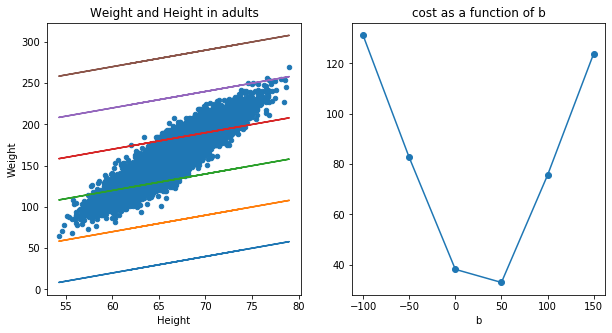

In [15]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(121)#num of graph u wana create 1 row 2 column 
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in adults',ax=ax1)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
    y_pred=line(x,w=2,b=b)
    mse=mean_squared_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(x,y_pred)
ax2=plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title('cost as a function of b')
plt.xlabel('b')

    

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [16]:
x=df[['Height']].values
y_true=df[['Weight']].values


In [17]:
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [18]:
x.shape

(10000, 1)

In [19]:
model=Sequential()
model.add(Dense(1,input_shape=(1,)))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(Adam(lr=0.8),'mean_squared_error')

In [23]:
model.fit(x,y_true,epochs=40)

Train on 10000 samples
Epoch 1/40
10000/10000 [==============================] - 2s 209us/sample - loss: 1420.5027
Epoch 2/40
10000/10000 [==============================] - 1s 67us/sample - loss: 558.4640
Epoch 3/40
10000/10000 [==============================] - 1s 69us/sample - loss: 530.3608
Epoch 4/40
10000/10000 [==============================] - 1s 69us/sample - loss: 498.6383
Epoch 5/40
10000/10000 [==============================] - 1s 68us/sample - loss: 451.0491
Epoch 6/40
10000/10000 [==============================] - 1s 68us/sample - loss: 413.5150
Epoch 7/40
10000/10000 [==============================] - 1s 67us/sample - loss: 377.6692
Epoch 8/40
10000/10000 [==============================] - 1s 69us/sample - loss: 350.2335
Epoch 9/40
10000/10000 [==============================] - 1s 69us/sample - loss: 315.6731
Epoch 10/40
10000/10000 [==============================] - 1s 68us/sample - loss: 287.8352
Epoch 11/40
10000/10000 [==============================] - 1s 68us/sample 

In [25]:
y_pred=model.predict(x)
y_pred

array([[209.86902],
       [171.58698],
       [211.85748],
       ...,
       [134.4477 ],
       [173.49414],
       [119.90802]], dtype=float32)

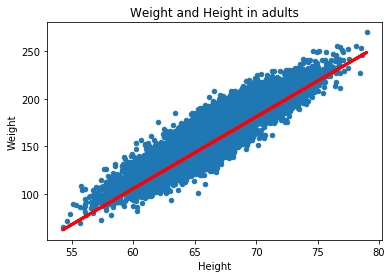

In [26]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',title='Weight and Height in adults')
plt.plot(x,y_pred,color='red',linewidth=3)

In [27]:
w,b=model.get_weights()

In [28]:
w

array([[7.5579896]], dtype=float32)

In [29]:
b

array([-348.26593], dtype=float32)

In [30]:
model.predict([[200]])

array([[1163.332]], dtype=float32)